## Classification on Success rate of Transaction data 

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import robust_scale,LabelEncoder,StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection  import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score,confusion_matrix,RocCurveDisplay
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier,RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [4]:
df = pd.read_csv('./Transation.csv')
df

,Unnamed: 0,Order Id,mobile,Amount,Credit Used,Status,Transid,Operator,Date
0,0,9229923,9526140221,299.0,290.03,SUCCESS,RBR2201281632260048,Vodafone Idea,2022-01-28 16:32:40
1,1,9227282,9946378150,49.0,47.53,SUCCESS,BRR2201281243220028,Vodafone Idea,2022-01-28 12:43:16
2,2,9218780,8111868204,299.0,290.03,SUCCESS,RBR2201271746310079,Vodafone Idea,2022-01-27 17:46:42
3,3,9203686,10236340203,229.0,222.13,SUCCESS,338548566,Sun Dth,2022-01-26 15:20:39
4,4,9187282,9656272617,179.0,173.63,SUCCESS,MHR2201251118270020,Vodafone Idea,2022-01-25 11:18:01
...,...,...,...,...,...,...,...,...,...
86,6,13893025,165160065,240.0,232.80,SUCCESS,WREC172182350JESSYJ,Videocon Dth,2023-04-20 20:24:19
87,7,13851722,9446121275,319.0,309.43,SUCCESS,7580357849,Bsnl Special,2023-04-14 22:53:10
88,8,13819094,9645587576,153.0,148.41,SUCCESS,7572233584,Bsnl Special,2023-04-10 15:54:03
89,9,13819078,75291432450,229.0,222.13,SUCCESS,21995247MADHU,Sun Dth,2023-04-10 15:49:51


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91 entries, 0 to 90
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   91 non-null     int64  
 1   Order Id     91 non-null     int64  
 2   mobile       91 non-null     int64  
 3   Amount       91 non-null     float64
 4   Credit Used  91 non-null     float64
 5   Status       91 non-null     object 
 6   Transid      86 non-null     object 
 7   Operator     91 non-null     object 
 8   Date         91 non-null     object 
dtypes: float64(2), int64(3), object(4)
memory usage: 6.5+ KB


In [6]:
df.drop(columns= ['Date','Unnamed: 0'],inplace=True)

In [7]:
df.columns

Index(['Order Id', 'mobile', 'Amount', 'Credit Used', 'Status', 'Transid',
       'Operator'],
      dtype='object')

### Label encoding

In [8]:
le = LabelEncoder()

In [9]:
for i in df.columns:
    if df[i].dtype == 'object':
        df[i] = le.fit_transform(df[i])

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91 entries, 0 to 90
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Order Id     91 non-null     int64  
 1   mobile       91 non-null     int64  
 2   Amount       91 non-null     float64
 3   Credit Used  91 non-null     float64
 4   Status       91 non-null     int32  
 5   Transid      91 non-null     int32  
 6   Operator     91 non-null     int32  
dtypes: float64(2), int32(3), int64(2)
memory usage: 4.0 KB


In [11]:
df1 = df[['Order Id', 'mobile', 'Amount', 'Credit Used', 'Transid',
       'Operator', 'Status']]

### Choosing target

In [12]:
x = df1.iloc[:,:-1].values
y = df1.iloc[:,-1].values

### Scaling using standard scaler

In [13]:
sc = StandardScaler()

In [14]:
x = sc.fit_transform(x)

In [15]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1])

### Checking if the target is balanced or not

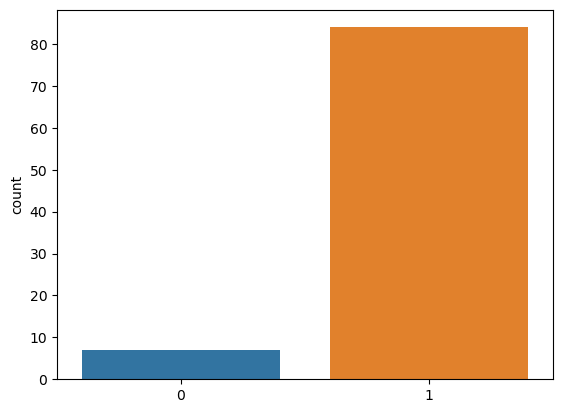

In [16]:
sns.countplot(x=y);

### Balancing using smote method

In [17]:
from imblearn.over_sampling import SMOTE

In [18]:
smote = SMOTE()

In [19]:
x_smote,y_smote = smote.fit_resample(x,y)

In [20]:
y_smote

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

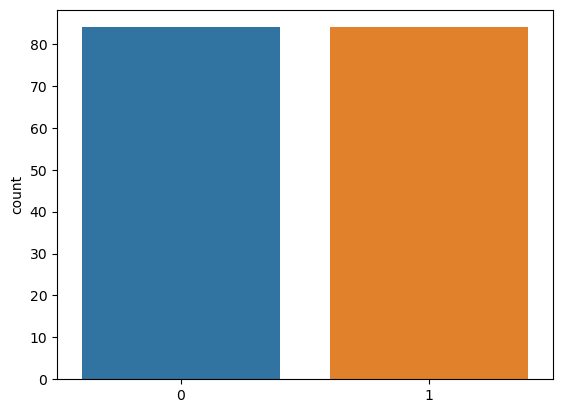

In [21]:
sns.countplot(x=y_smote);

#### Balancing using ADASYN method

In [22]:
from imblearn.over_sampling import ADASYN
adasyn = ADASYN()

In [23]:
x_adasyn,y_adasyn = adasyn.fit_resample(x,y)

In [24]:
y_adasyn

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

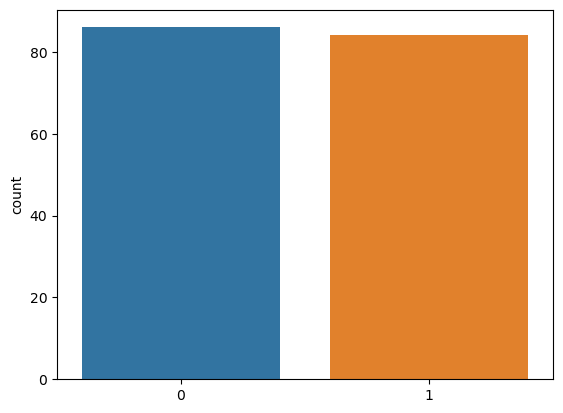

In [25]:
sns.countplot(x= y_adasyn);

### Finding suitable model for classification

In [28]:
models = {'LogisticRegression':LogisticRegression(),
         'AdaBoostClassifier':AdaBoostClassifier(),
         'GradientBoostingClassifier':GradientBoostingClassifier(),
         'RandomForestClassifier':RandomForestClassifier(),
         'KNeighborsClassifier':KNeighborsClassifier(),
         'DecisionTreeClassifier':DecisionTreeClassifier()}

In [32]:
for name,model in models.items():
    cv_score = cross_val_score(model,x,y,scoring='accuracy',cv=10,n_jobs=-1)
    print('Your cross validation mpdel is: ',model)
    print('Mean cross validation score is: ',np.mean(cv_score)*100)
    print('*'*100)

Your cross validation mpdel is:  LogisticRegression()
Mean cross validation score is:  96.77777777777777
****************************************************************************************************
Your cross validation mpdel is:  AdaBoostClassifier()
Mean cross validation score is:  100.0
****************************************************************************************************
Your cross validation mpdel is:  GradientBoostingClassifier()
Mean cross validation score is:  100.0
****************************************************************************************************
Your cross validation mpdel is:  RandomForestClassifier()
Mean cross validation score is:  100.0
****************************************************************************************************
Your cross validation mpdel is:  KNeighborsClassifier()
Mean cross validation score is:  97.88888888888889
*********************************************************************************************

##### we can choose RandomForestClassifier as our model

### Classification

In [30]:
model =RandomForestClassifier()

In [31]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=100,shuffle=True)

### Training and Testing accuracy

In [41]:
model.fit(x_train,y_train)
print('Model trained with RandomForestClassifier')
y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)
accuracy_score_train = accuracy_score(y_train,y_pred_train)
accuracy_score_test = accuracy_score(y_test,y_pred_test)

print('Model training accuracy is:',accuracy_score_train)
print('Model testing accuracy  is: ',accuracy_score_test)

Model trained with RandomForestClassifier
Model training accuracy is: 1.0
Model testing accuracy  is:  0.9473684210526315


### confusion matrix

In [38]:
con_matrix_train = confusion_matrix(y_train,y_pred_train)
con_matrix_test = confusion_matrix(y_test,y_pred_test)

print('confusion_matrix of train is:',con_matrix_train)
print('confusion_matrix of test is: ',con_matrix_test)

confusion_matrix of train is: [[ 5  0]
 [ 0 67]]
confusion_matrix of test is:  [[ 2  0]
 [ 0 17]]


In [37]:
print('Wrong prediction made is: ',(y_test!=y_pred_test).sum(),'/',len(y_test))

Wrong prediction made is:  0 / 19


### ROC Curve

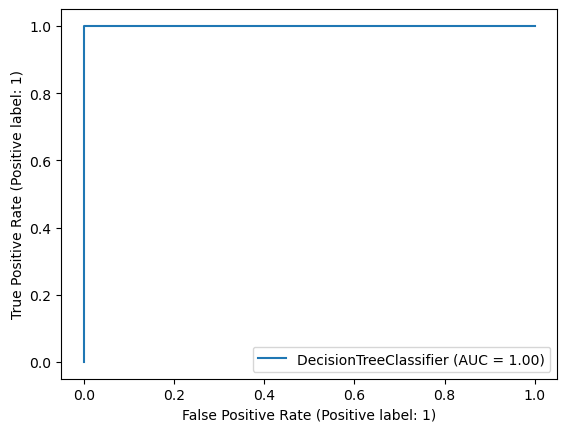

In [35]:
Roc_Display = RocCurveDisplay.from_estimator(model,x_test,y_test)

In [2]:
# AUC =  Area under the curve